Please note that this example focuses on the raw data utilized for human Myelinating Schwann Cells (mSCs) in the Dorsal Root Ganglion. NetREm is applied for predicting Transcription Factor (TF) to Target Gene (TG) regulatory links (given by coefficient **c*** as well) as for potential TF-TF interactions (given by *B* matrix values).
😊🤓

This is a Bioinformatics Application🧑‍🔬👩‍🔬👨‍🔬👩🏼‍🔬👨🏼‍🔬🧑🏼‍🔬🧑🏻‍🔬👨🏻‍🔬👩🏻‍🔬🧑🏽‍🔬👨🏽‍🔬👩🏽‍🔬🧑🏾‍🔬👨🏾‍🔬👩🏾‍🔬🧑🏿‍🔬👨🏿‍🔬🧬🧫🔬🧑🏿‍💻👨🏿‍💻👩🏿‍💻👩🏾‍💻👨🏾‍💻🧑🏾‍💻👩🏽‍💻👨🏽‍💻🧑🏽‍💻👩🏼‍💻👨🏼‍💻🧑🏼‍💻👩🏻‍💻👨🏻‍💻🧑🏻‍💻👩‍💻👨‍💻🧑‍💻

#### By: Saniya Khullar, Xiang Huang, Raghu Ramesh, John Svaren, Daifeng Wang
##### University of Wisconsin - Madison

In [1]:
printdf = lambda *args, **kwargs: print(pd.DataFrame(*args, **kwargs))
rng_seed = 2023 # random seed for reproducibility
randSeed = 123
from packages_needed import *
import error_metrics as em 
from packages_needed import *
import Netrem_model_builder as nm
import DemoDataBuilderXandY as demo
import PriorGraphNetwork as graph
import netrem_evaluation_functions as nm_eval
import essential_functions as ef


![netrem_info.png](../user_guide/pics/netrem_info.png)

## Input Datasets for NetREm
To load in *parquet* files (more efficient than csv files) and write them out, please ensure `pyarrow` is installed by running `pip install pyarrow` in the *terminal* 🧑‍💻👩‍💻👨‍💻. 

In [2]:
# file names (FNs) of input data: 🥸
# Please note that Saniya deposited these data files here: 
# https://github.com/SaniyaKhullar/NetREm/tree/main/data/myelin_Schwann_Cells 

tfs_for_tgs_FN = "myelin_candidate_TFs_for_TGs.parquet"
train_data_FN = "myelin_training_gene_expression_data.parquet"
test_data_FN = "myelin_testing_gene_expression_data.parquet"
ppi_FN = "ppi_dataframe.parquet"

These raw data files for this tutorial are available here: https://github.com/SaniyaKhullar/NetREm/tree/main/data/myelin_Schwann_Cells

A list of potential candidate TFs for each given target gene (TG). Please note that we constructed this input list of candidate TFs for the respective TGs using various data sources such as motif binding analysis, colocalization of TFs, molecular function, etc.

In [3]:
# list of potential candidate TFs for each given target gene (TG)
tfs_for_tgs_final_df = pd.read_parquet(tfs_for_tgs_FN)
tfs_for_tgs_final_df

,TG,TF
0,A1BG,CREB3L2
1,A1BG,CTCF
2,A1BG,ELF2
3,A1BG,GTF3C2
4,A1BG,IRF3
...,...,...
635390,ZZZ3,BACH1
635391,ZZZ3,TCF3
635392,ZZZ3,ERF
635393,ZZZ3,ZNF281


Single-cell gene expression data that is cell samples by genes:

In [4]:
train_gexpr = pd.read_parquet(train_data_FN) # 70% of the original gene expression data (random split)
train_gexpr

,Unnamed: 0,SAMD11,NOC2L,KLHL17,PLEKHN1,PERM1,HES4,ISG15,AGRN,C1orf159,...,STK26,RTL8B,RTL8C,RTL8A,SMIM10L2B,SMIM10L2A,INTS6L,ADGRG4,PNMA6A,CCNQ
0,ATCGCCTAGTAGATCA-1_1,0.0,0.0,0.0,0,0,1.232599,0.0,0.0,0.795283,...,0,0,0.000000,0,0,0,0.0,0,0,0.0
1,ATGAGGGCATGGGAAC-1_4,0.0,0.0,0.0,0,0,0.000000,0.0,0.0,0.000000,...,0,0,0.000000,0,0,0,0.0,0,0,0.0
2,GGGACCTCAGACAAAT-1_3,0.0,0.0,0.0,0,0,0.000000,0.0,0.0,0.000000,...,0,0,0.000000,0,0,0,0.0,0,0,0.0
3,CGATGGCCAGATCCTA-1_5,0.0,0.0,0.0,0,0,0.000000,0.0,0.0,0.000000,...,0,0,2.517899,0,0,0,0.0,0,0,0.0
4,AATCGACGTGGCACTC-1_5,0.0,0.0,0.0,0,0,0.000000,0.0,0.0,0.000000,...,0,0,0.000000,0,0,0,0.0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,GGGAAGTAGCTTAAGA-1_2,0.0,0.0,0.0,0,0,0.000000,0.0,0.0,2.360130,...,0,0,0.000000,0,0,0,0.0,0,0,0.0
219,GGAACCCGTCACTTCC-1_4,0.0,0.0,0.0,0,0,0.000000,0.0,0.0,0.000000,...,0,0,0.000000,0,0,0,0.0,0,0,0.0
220,CGGGTCACAAACGGCA-1_2,0.0,0.0,0.0,0,0,0.000000,0.0,0.0,0.000000,...,0,0,0.000000,0,0,0,0.0,0,0,0.0
221,CACCAAACATAGAATG-1_1,0.0,0.0,0.0,0,0,1.267693,0.0,0.0,0.822562,...,0,0,0.000000,0,0,0,0.0,0,0,0.0


In [5]:
test_gexpr = pd.read_parquet(test_data_FN) # remaining 30% of the original gene expression data
test_gexpr

,Unnamed: 0,SAMD11,NOC2L,KLHL17,PLEKHN1,PERM1,HES4,ISG15,AGRN,C1orf159,...,STK26,RTL8B,RTL8C,RTL8A,SMIM10L2B,SMIM10L2A,INTS6L,ADGRG4,PNMA6A,CCNQ
0,CCCAACTGTCGAATTC-1_5,0.000000,0.0,0.0,0,0,0.000000,0.000000,0.0,0.000000,...,0,0,0.0,0,0,0,0.0,0,0,0.0
1,GTTCGCTGTACAGTTC-1_1,0.000000,0.0,0.0,0,0,0.000000,0.000000,0.0,0.000000,...,0,0,0.0,0,0,0,0.0,0,0,0.0
2,AGGAGGTCATTGACTG-1_2,0.000000,0.0,0.0,0,0,0.840949,0.840949,0.0,0.000000,...,0,0,0.0,0,0,0,0.0,0,0,0.0
3,TAAGTCGTCTTCGTGC-1_3,0.000000,0.0,0.0,0,0,0.000000,0.000000,0.0,0.000000,...,0,0,0.0,0,0,0,0.0,0,0,0.0
4,GCCAGCATCAGAGCAG-1_2,0.000000,0.0,0.0,0,0,0.000000,0.000000,0.0,0.000000,...,0,0,0.0,0,0,0,0.0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,AAGGAATCACGGGCTT-1_3,0.000000,0.0,0.0,0,0,0.000000,0.000000,0.0,0.000000,...,0,0,0.0,0,0,0,0.0,0,0,0.0
92,ATAGAGATCAAAGGTA-1_2,0.000000,0.0,0.0,0,0,0.000000,0.000000,0.0,1.048932,...,0,0,0.0,0,0,0,0.0,0,0,0.0
93,TTTGTTGTCTACGCGG-1_2,0.000000,0.0,0.0,0,0,1.001498,0.000000,0.0,0.000000,...,0,0,0.0,0,0,0,0.0,0,0,0.0
94,GCCATGGGTGGAACAC-1_1,0.000000,0.0,0.0,0,0,1.973762,0.000000,0.0,0.000000,...,0,0,0.0,0,0,0,0.0,0,0,0.0


Input Protein-Protein Interaction (PPI) Network:

In [6]:
ppi_df = pd.read_parquet(ppi_FN)
ppi_df

,TF1,TF2,score
323,NR2C2,NR2C1,1.000000
432,NR2C1,NR2C2,1.000000
545,ATF7,ATF2,1.000000
572,CUX1,ATF2,1.000000
573,JUND,ATF2,1.000000
...,...,...,...
23168702,TEAD1,TEAD4,0.922923
24614146,NFIA,NFIB,0.812813
28106670,MEF2C,MEF2B,0.912209
28172345,NFIB,NFIA,0.983943


Next, please note that we will use NetREm (Network Regression Embeddings) to identify the optimal Transcription Factors (TFs) out of the N candidate TFs, which may regulate this TG.
NetREm is run 1 TG at a time, to eventually build out networks for the cell-type :)

## Integration of multimodal data and networks:

![netrem_step1.png](../user_guide/pics/netrem_step1.png)

In [7]:
tg = "ZZZ3" # target gene of interest

In [8]:
# training gene expression data for target gene (TG) y
y_train = train_gexpr[[tg]]
y_train

,ZZZ3
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
218,0.0
219,0.0
220,0.0
221,0.0


In [9]:
# testing gene expression data for target gene (TG) y
y_test = test_gexpr[[tg]]
y_test

,ZZZ3
0,0.000000
1,1.406272
2,0.000000
3,0.000000
4,0.000000
...,...
91,0.000000
92,0.000000
93,0.000000
94,0.000000


In [10]:
candidate_TFs_for_TG_df = tfs_for_tgs_final_df[tfs_for_tgs_final_df["TG"] == tg]
num_candidate_TFs_for_TG = candidate_TFs_for_TG_df.shape[0]
print(f":) Please note that we have N = {num_candidate_TFs_for_TG} candidate TFs for our TG {tg}")
candidate_TFs_for_TG_df

:) Please note that we have N = 77 candidate TFs for our TG ZZZ3


,TG,TF
635318,ZZZ3,CTCF
635319,ZZZ3,E2F3
635320,ZZZ3,EBF1
635321,ZZZ3,FOXP1
635322,ZZZ3,GTF3C2
...,...,...
635390,ZZZ3,BACH1
635391,ZZZ3,TCF3
635392,ZZZ3,ERF
635393,ZZZ3,ZNF281


In [11]:
candidate_TFs_for_TG = list(candidate_TFs_for_TG_df["TF"]) 
candidate_TFs_for_TG.sort() # Saniya sorts alphabetically for convenience :)
print(f"Some of the first few candidate TFs for the TG {tg}: {candidate_TFs_for_TG[0:6]}")

Some of the first few candidate TFs for the TG ZZZ3: ['BACH1', 'BCL6', 'CCNT2', 'CTCF', 'E2F3', 'E4F1']


Please note that we will utilize this given data to fit our network regularized regression problem for our target gene (TG):

**NetREm model training:**
* filtered_ppi_for_TG
* X_train
* y_train

**NetREm model testing:**
* X_test
* y_test

In [12]:
# we filter the PPI to only include the candidate TFs for our TG
filtered_ppi_for_TG = ppi_df[ppi_df["TF1"].isin(candidate_TFs_for_TG)]
filtered_ppi_for_TG = filtered_ppi_for_TG[filtered_ppi_for_TG["TF2"].isin(candidate_TFs_for_TG)].drop_duplicates()
filtered_ppi_for_TG

,TF1,TF2,score
32314,HCFC1,SP1,1.000000
32369,SMC3,SP1,1.000000
32387,HDAC2,SP1,1.000000
32457,GTF3C2,SP1,1.000000
32619,MGA,SP1,1.000000
...,...,...,...
14290770,ZFP82,TP53,0.219219
14292496,ZNF136,SMC3,0.157157
14293375,ZNF274,HDAC2,0.245245
14293598,ZNF281,SMAD4,0.183183


In [13]:
# # Then, we need to do this conversion for NetREm:
filtered_ppi_for_TG = filtered_ppi_for_TG.values.tolist()
print(len(filtered_ppi_for_TG))
filtered_ppi_for_TG[0:5] # first 5 entries

2860


[['HCFC1', 'SP1', 1.0],
 ['SMC3', 'SP1', 1.0],
 ['HDAC2', 'SP1', 1.0],
 ['GTF3C2', 'SP1', 1.0],
 ['MGA', 'SP1', 1.0]]

In [14]:
X_train = train_gexpr[candidate_TFs_for_TG] 
X_train

,BACH1,BCL6,CCNT2,CTCF,E2F3,E4F1,EBF1,EGR1,ELF1,ERF,...,YY1,ZBTB7A,ZFP28,ZFP82,ZNF136,ZNF140,ZNF274,ZNF281,ZNF682,ZNF76
0,0.795283,0.000000,0.795283,0.000000,1.956615,0.0,0.0,0.0,0.795283,0.0,...,0.795283,0.000000,0.000000,0.0,0.000000,0.000000,0.795283,0.0,0.0,0.0
1,0.000000,2.167218,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,2.517899,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
4,0.000000,0.000000,0.000000,1.297927,1.297927,0.0,0.0,0.0,2.195567,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.757196,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
219,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.000000,2.478969,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
220,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,1.734546,0.000000,0.0,0.0,0.0
221,0.000000,2.158477,0.822562,0.000000,0.000000,0.0,0.0,0.0,0.822562,0.0,...,0.822562,0.000000,0.000000,0.0,0.822562,0.000000,0.822562,0.0,0.0,0.0


In [15]:
X_test = test_gexpr[candidate_TFs_for_TG]
X_test

,BACH1,BCL6,CCNT2,CTCF,E2F3,E4F1,EBF1,EGR1,ELF1,ERF,...,YY1,ZBTB7A,ZFP28,ZFP82,ZNF136,ZNF140,ZNF274,ZNF281,ZNF682,ZNF76
0,0.000000,2.536981,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000
1,1.406272,2.326511,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,1.406272,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,1.96871,0.000000
2,0.840949,0.840949,0.000000,0.840949,0.000000,0.000000,0.0,0.0,0.840949,0.0,...,0.840949,0.000000,0.0,0.000000,0.840949,0.0,0.000000,0.000000,0.00000,0.000000
3,0.000000,0.000000,2.326094,0.000000,0.000000,1.726143,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.0,1.726143,0.000000,0.0,0.000000,0.000000,0.00000,0.000000
4,1.893136,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.893136,0.0,...,1.340271,0.000000,0.0,1.340271,0.000000,0.0,0.000000,0.000000,0.00000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,0.000000,0.000000,2.889145,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,3.554086,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000
92,0.000000,1.048932,0.000000,0.000000,1.048932,0.000000,0.0,0.0,1.048932,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000
93,1.001498,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,1.001498,0.000000,0.00000,1.001498
94,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,1.410707,0.000000,0.0,0.000000,0.000000,0.0,0.000000,1.410707,0.00000,0.000000


Below, Saniya first shows the performance of 4 Baseline models (all fit using Cross Validation (CV) except Linear Regression) and then presents many examples of how NetREm may be applied, via **netrem**, **netremCV**, and/or Bayesian hyperparamater optimization. We recommend trying out these examples for your specific needs. 😁

Please note that video tutorials on NetREm will soon be available on [Saniya's YouTube channel](https://www.youtube.com/c/SaniyaKhullar)📽️👩‍🏫.

**Example 1: Mainly using defaults and/or Cross-Validation to determine best values (minimal input from user 😴)** 
* 1a: *netrem*: defaults for beta and $\alpha_{lasso}$ 
* 1b: *netrem*: default beta_net and LassoCV to find $\alpha_{lasso}$ 
* 1c: *netremCV*: find the optimal beta and optimal $\alpha_{lasso}$  via Cross Validation (CV) (3 examples)
* 1d: *netrem and netrem-based function*: bayesian optimization to determine the optimal $\alpha_{lasso}$ and $\beta_{net}$ in fixed default ranges

**Example 2: User provides inputs for NetREm (more input needed from user🤓🤔)** 
* 2a: *netrem*: using user-defined values for $\beta_{net}$ and $\alpha_{lasso}$ 
* 2b. *netrem*: using user-defined value for $\beta_{net}$ and using LassoCV to find optimal $\alpha_{lasso}$ 
* 2c: *netrem*: using GridSearchCV for comprehensive hyperparameter optimization
* 2d: *netrem*: using RandomizedSearchCV for comprehensive hyperparameter optimization
* 2e: *netrem and netrem-based function*: bayesian optimization to determine the optimal $\alpha_{lasso}$ and $\beta_{net}$ for ranges of values defined by the user. 

**Example 3: User provides more inputs for more comprehensive hyperparameter optimization (building on #2)**
* 3a: *netrem*: using GridSearchCV for comprehensive hyperparameter optimization

### Baseline Examples: We fit models using Scikit-Learn packages for LinearRegression, LassoCV, RidgeCV, and ElasticNetCV on the data.

#### Baseline Example 1: Fitting model with y-intercept term

In [16]:
# Examples with and without the y-intercept term included:
baseline_model_names = ["ElasticNetCV", "RidgeCV", "LassoCV", "LinearRegression"]
baseline_df = pd.DataFrame()
for model in baseline_model_names:
        df_to_add1 = nm_eval.baseline_metrics_function(X_train = X_train, y_train = y_train, 
                                                      X_test = X_test, y_test = y_test, 
                                                      tg = tg, model_name = model, y_intercept = True)
        df_to_add2 = nm_eval.baseline_metrics_function(X_train = X_train, y_train = y_train, 
                                                      X_test = X_test, y_test = y_test, 
                                                      tg = tg, model_name = model, y_intercept = False)
        baseline_df = pd.concat([baseline_df, df_to_add1, df_to_add2])
baseline_df

C:\Users\saniy\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\saniy\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\saniy\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\saniy\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1568: DataConversionWarning: A column-vector y was passed when a 1d

,AbsoluteVal_coefficient,Rank,TF,Info,y_intercept,final_model_TFs,TFs_input_to_model,original_TFs_in_X,train_mse,test_mse,train_nmse,test_nmse,train_snr,test_snr,train_psnr,test_psnr,TG
0,0.097586,1,SETDB1,ElasticNetCV,True :),14,77,77,0.532199,0.644359,0.613835,0.665892,2.119487,1.765960,12.517163,10.656326,ZZZ3
1,0.089008,2,ELF1,ElasticNetCV,True :),14,77,77,0.532199,0.644359,0.613835,0.665892,2.119487,1.765960,12.517163,10.656326,ZZZ3
2,0.076589,3,BACH1,ElasticNetCV,True :),14,77,77,0.532199,0.644359,0.613835,0.665892,2.119487,1.765960,12.517163,10.656326,ZZZ3
3,0.074991,4,NFKB1,ElasticNetCV,True :),14,77,77,0.532199,0.644359,0.613835,0.665892,2.119487,1.765960,12.517163,10.656326,ZZZ3
4,0.059867,5,NFIB,ElasticNetCV,True :),14,77,77,0.532199,0.644359,0.613835,0.665892,2.119487,1.765960,12.517163,10.656326,ZZZ3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,0.008444,73,NR1D2,LinearRegression,False :(,77,77,77,0.875647,1.094298,1.009965,1.130868,-0.043063,-0.534117,10.354613,8.356249,ZZZ3
73,0.007707,74,NR6A1,LinearRegression,False :(,77,77,77,0.875647,1.094298,1.009965,1.130868,-0.043063,-0.534117,10.354613,8.356249,ZZZ3
74,0.002535,75,RXRA,LinearRegression,False :(,77,77,77,0.875647,1.094298,1.009965,1.130868,-0.043063,-0.534117,10.354613,8.356249,ZZZ3
75,0.001695,76,THRB,LinearRegression,False :(,77,77,77,0.875647,1.094298,1.009965,1.130868,-0.043063,-0.534117,10.354613,8.356249,ZZZ3


😊 We can view some of the baseline metrics at-a-glance:

In [17]:
comparison_df = baseline_df[["TG", "Info", "y_intercept", 
             "final_model_TFs", "train_mse", "test_mse", "train_nmse", 
             "test_nmse", "train_snr", "test_snr", "train_psnr", "test_psnr"]].drop_duplicates()
comparison_df

,TG,Info,y_intercept,final_model_TFs,train_mse,test_mse,train_nmse,test_nmse,train_snr,test_snr,train_psnr,test_psnr
0,ZZZ3,ElasticNetCV,True :),14,0.532199,0.644359,0.613835,0.665892,2.119487,1.765960,12.517163,10.656326
0,ZZZ3,ElasticNetCV,False :(,16,0.517626,0.658863,0.597026,0.680881,2.240065,1.669286,12.637741,10.559653
0,ZZZ3,RidgeCV,True :),77,0.805343,0.897581,0.928876,0.927576,0.320422,0.326504,10.718098,9.216870
0,ZZZ3,RidgeCV,False :(,77,0.805521,0.897883,0.929082,0.927888,0.319459,0.325043,10.717135,9.215409
0,ZZZ3,LassoCV,True :),13,0.535477,0.646487,0.617616,0.668092,2.092818,1.751640,12.490494,10.642006
0,ZZZ3,LassoCV,False :(,13,0.518113,0.660872,0.597587,0.682957,2.235986,1.656065,12.633662,10.546431
0,ZZZ3,LinearRegression,True :),77,0.878113,1.099653,1.012809,1.136401,-0.055274,-0.555317,10.342402,8.335050
0,ZZZ3,LinearRegression,False :(,77,0.875647,1.094298,1.009965,1.130868,-0.043063,-0.534117,10.354613,8.356249


Please note that:
* MSE is Mean Squared Error (smaller values are better 😀)
* NMSE is Normalized MSE (smaller values are better 😀)
* SNR is Signal to Noise Ratio (larger values are better 😀)
* PSNR is Peak SNR (larger values are better 😀)

### Below, Saniya will show examples utilizing NetREm (Network Regression Embeddings) 

## Example 1️⃣:
### using defaults when possible :) 😴

### Example 1a: 
#### Using the defaults for *beta_net* $\beta_{net}$ and *alpha_lasso* $\alpha_{lasso}$ .

In [18]:
print(len(filtered_ppi_for_TG))
filtered_ppi_for_TG[0:5] # Saniya views the first few entries of the input edge list
# [[node1, node2, weight (if known)],...]

2860


[['HCFC1', 'SP1', 1.0],
 ['SMC3', 'SP1', 1.0],
 ['HDAC2', 'SP1', 1.0],
 ['GTF3C2', 'SP1', 1.0],
 ['MGA', 'SP1', 1.0]]

In [19]:
%%time 
# added %%time above time the amount of time to run the code in the cell block

# Using defaults for beta and alpha:
netrem_1a = nm.netrem(edge_list = filtered_ppi_for_TG)

# Fitting the gregulnet model on training data: X_train and y_train:
netrem_1a.fit(X_train, y_train)

# Analyzing the NetREm Function
final_model_1a = netrem_1a.model_nonzero_coef_df
print(f"# of TFs with non-zero coefficients: {netrem_1a.num_final_predictors}")
mse_train = netrem_1a.test_mse(X_train, y_train)
mse_test = netrem_1a.test_mse(X_test, y_test)
print(f"Training MSE: {mse_train}")
print(f"Testing MSE: {mse_test}")
final_model_1a

using beta_net default of 1
using alpha_lasso default of 0.01
# of TFs with non-zero coefficients: 64
Training MSE: 0.3737117946233456
Testing MSE: 0.8001180556448904
CPU times: total: 15.6 ms
Wall time: 135 ms


,y_intercept,BACH1,CCNT2,CTCF,E2F3,E4F1,EBF1,EGR1,ELF1,ERF,...,USF2,YY1,ZBTB7A,ZFP28,ZNF136,ZNF140,ZNF274,ZNF281,ZNF682,ZNF76
0,None,0.082233,0.037328,-0.042766,0.111699,-0.116511,-0.036823,-0.007836,0.098594,-0.07906,...,-0.035468,0.094879,-0.038099,-0.029647,0.016213,0.052777,-0.015103,0.009506,0.002639,0.077868


In [20]:
netrem_1a

NetREmModel(verbose=False, overlapped_nodes_only=False, all_pos_coefs=False, model_type=Lasso, standardize_X=True, center_y=True, use_network=True, y_intercept=False, max_lasso_iterations=10000, view_network=False, tolerance=0.0001, lasso_selection=cyclic, network=<PriorGraphNetwork.PriorGraphNetwork object at 0x0000024C3D5092D0>)

![netrem_1a.png](../user_guide/pics/netrem_1a.png)

In [21]:
print("To view the TF-TG regulatory links for the optimal TFs, please note that we can access this:")
netrem_1a.combined_df

To view the TF-TG regulatory links for the optimal TFs, please note that we can access this:


,coef,TF,TG,info,train_mse,beta_net,alpha_lasso,AbsoluteVal_coefficient,Rank,final_model_TFs,TFs_input_to_model,original_TFs_in_X,standardized_X,centered_y
0,None,y_intercept,ZZZ3,netrem_no_intercept,0.373712,1,0.01,NaN,65,64,77,77,True,True
1,0.082233,BACH1,ZZZ3,netrem_no_intercept,0.373712,1,0.01,0.082233,10,64,77,77,True,True
2,0.037328,CCNT2,ZZZ3,netrem_no_intercept,0.373712,1,0.01,0.037328,34,64,77,77,True,True
3,-0.042766,CTCF,ZZZ3,netrem_no_intercept,0.373712,1,0.01,0.042766,27,64,77,77,True,True
4,0.111699,E2F3,ZZZ3,netrem_no_intercept,0.373712,1,0.01,0.111699,4,64,77,77,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,0.052777,ZNF140,ZZZ3,netrem_no_intercept,0.373712,1,0.01,0.052777,24,64,77,77,True,True
61,-0.015103,ZNF274,ZZZ3,netrem_no_intercept,0.373712,1,0.01,0.015103,56,64,77,77,True,True
62,0.009506,ZNF281,ZZZ3,netrem_no_intercept,0.373712,1,0.01,0.009506,59,64,77,77,True,True
63,0.002639,ZNF682,ZZZ3,netrem_no_intercept,0.373712,1,0.01,0.002639,63,64,77,77,True,True


In [22]:
netrem_1a.get_params()

{'info': 'NetREm Model',
 'alpha_lasso': 0.01,
 'beta_net': 1,
 'y_intercept': False,
 'model_type': 'Lasso',
 'standardize_X': True,
 'center_y': True,
 'max_lasso_iterations': 10000,
 'network': <PriorGraphNetwork.PriorGraphNetwork at 0x24c3d50b580>,
 'verbose': False,
 'all_pos_coefs': False,
 'model_info': 'fitted_model :)',
 'target_gene_y': 'ZZZ3',
 'tolerance': 0.0001,
 'lasso_selection': 'cyclic'}

In [23]:
vars(netrem_1a).keys() # to view all of the keys we may call

dict_keys(['info', 'verbose', 'overlapped_nodes_only', 'num_cv_folds', 'num_jobs', 'all_pos_coefs', 'model_type', 'standardize_X', 'center_y', 'use_network', 'y_intercept', 'max_lasso_iterations', 'view_network', 'model_info', 'target_gene_y', 'tolerance', 'lasso_selection', 'lassocv_eps', 'lassocv_n_alphas', 'lassocv_alphas', 'beta_net', 'network', 'alpha_lasso', 'optimal_alpha', 'prior_network', 'preprocessed_network', 'network_params', 'network_nodes_list', 'kwargs', 'old_X_df', 'scaler', 'X_df', 'mean_y_train', 'old_y', 'gene_expression_nodes', 'common_nodes', 'final_nodes', 'gexpr_nodes_added', 'gexpr_nodes_to_add_for_net', 'filter_network_bool', 'A_df', 'A', 'nodes', 'network_info', 'M', 'N', 'X_train', 'y_train', 'B_train', 'B_interaction_df', 'B_train_times_M', 'X_tilda_train', 'y_tilda_train', 'X_training_to_use', 'y_training_to_use', 'regr', 'final_alpha', 'coef', 'predY_tilda_train', 'mse_tilda_train', 'predY_train', 'mse_train', 'model_coef_df', 'model_nonzero_coef_df', 'so

In [24]:
print(f":) We can view the sorted B-matrix of TF-TF interaction for N = {num_candidate_TFs_for_TG} TFs ", end="")
print(f"for TG {tg} where beta_net = {netrem_1a.beta_net}.")

:) We can view the sorted B-matrix of TF-TF interaction for N = 77 TFs for TG ZZZ3 where beta_net = 1.


In [25]:
b_matrix_1a = nm.organize_B_interaction_network(netrem_1a)
b_matrix_1a

,TF1,TF2,B_train_weight,sign,potential_interaction,absVal_B,info,candidate_TFs_N,target_gene_y,num_final_predictors,model_type,beta_net,X_standardized,gene_data,rank,percentile
3089,ERF,RARA,0.377660,:),:(,0.377660,B matrix of TF-TF interactions,77,ZZZ3,64,Lasso,1,True,training gene expression data,1.0,99.982912
733,RARA,ERF,0.377660,:),:(,0.377660,B matrix of TF-TF interactions,77,ZZZ3,64,Lasso,1,True,training gene expression data,1.0,99.982912
4830,SP4,THRA,0.309812,:),:(,0.309812,B matrix of TF-TF interactions,77,ZZZ3,64,Lasso,1,True,training gene expression data,3.0,99.948735
4374,THRA,SP4,0.309812,:),:(,0.309812,B matrix of TF-TF interactions,77,ZZZ3,64,Lasso,1,True,training gene expression data,3.0,99.948735
1157,CCNT2,GTF3C2,0.294422,:),:(,0.294422,B matrix of TF-TF interactions,77,ZZZ3,64,Lasso,1,True,training gene expression data,5.0,99.914559
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2104,MXI1,NFIB,-0.000099,:(,:( competitive (-),0.000099,B matrix of TF-TF interactions,77,ZZZ3,64,Lasso,1,True,training gene expression data,5847.0,0.085441
501,PPARD,EBF1,-0.000073,:(,:( competitive (-),0.000073,B matrix of TF-TF interactions,77,ZZZ3,64,Lasso,1,True,training gene expression data,5849.0,0.051265
3009,EBF1,PPARD,-0.000073,:(,:( competitive (-),0.000073,B matrix of TF-TF interactions,77,ZZZ3,64,Lasso,1,True,training gene expression data,5849.0,0.051265
4416,NFIB,SREBF2,0.000017,:),:(,0.000017,B matrix of TF-TF interactions,77,ZZZ3,64,Lasso,1,True,training gene expression data,5851.0,0.017088


Please note that the original B matrix provided by NetREm for the above dataframe can be accessed as:

In [26]:
netrem_1a.B_interaction_df

,BACH1,BCL6,CCNT2,CTCF,E2F3,E4F1,EBF1,EGR1,ELF1,ERF,...,YY1,ZBTB7A,ZFP28,ZFP82,ZNF136,ZNF140,ZNF274,ZNF281,ZNF682,ZNF76
BACH1,1.001014,0.006931,0.029868,0.037067,0.115823,0.096015,-0.026938,-0.085929,0.053173,-0.050285,...,0.060455,-0.127127,0.130167,0.034985,-0.038288,-0.014485,-0.003645,-0.013945,0.100922,0.220974
BCL6,0.006931,1.000380,-0.030912,0.099877,0.033425,0.084484,0.042021,0.167647,-0.001430,-0.030980,...,-0.049502,0.009575,-0.049188,-0.055083,0.091035,0.074417,0.030387,0.061882,-0.077667,0.009637
CCNT2,0.029868,-0.030912,1.000534,-0.041336,0.064220,-0.034845,0.200429,-0.014384,0.087160,-0.072496,...,0.041720,-0.159583,0.005063,0.095355,-0.066803,-0.007069,-0.015422,0.070756,-0.033241,0.026809
CTCF,0.037067,0.099877,-0.041336,1.000418,-0.008862,-0.035295,0.023718,-0.012278,0.075094,0.087280,...,0.061837,0.038742,0.063451,-0.081830,0.054662,0.026185,-0.092063,0.065640,-0.050713,-0.013749
E2F3,0.115823,0.033425,0.064220,-0.008862,1.000594,0.060547,-0.042038,-0.056127,0.038343,0.021186,...,0.087368,-0.015594,-0.061301,0.045527,-0.024322,0.015630,0.012085,-0.062511,0.063579,0.134701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZNF140,-0.014485,0.074417,-0.007069,0.026185,0.015630,0.057234,0.016359,0.040648,0.088203,-0.043766,...,0.089469,-0.037242,-0.019876,-0.036205,-0.066733,1.001179,-0.015461,0.007951,0.008712,0.024481
ZNF274,-0.003645,0.030387,-0.015422,-0.092063,0.012085,-0.037590,0.028432,-0.047795,-0.003196,0.034681,...,-0.078485,0.009462,-0.035426,-0.072368,0.048625,-0.015461,1.000738,-0.049910,0.035145,0.062399
ZNF281,-0.013945,0.061882,0.070756,0.065640,-0.062511,-0.041239,0.261632,-0.024010,0.085566,-0.026948,...,0.033034,0.042783,-0.026287,0.024566,-0.041042,0.007951,-0.049910,1.000524,0.117684,0.086370
ZNF682,0.100922,-0.077667,-0.033241,-0.050713,0.063579,-0.009797,-0.028859,-0.048476,0.083974,-0.054609,...,0.095971,-0.025390,-0.053473,-0.006549,0.087076,0.008712,0.035145,0.117684,3.613374,0.053998


### Example 1b: 
#### Use the default *beta_net* $\beta_{net}$ but use LassoCV to help find the optimal *alpha_lasso* $\alpha_{lasso}$ via Cross-Validation.

In [27]:
%%time 
# Using defaults for beta and alpha:
netrem_1b = nm.netrem(edge_list = filtered_ppi_for_TG,
                     model_type = "LassoCV")

# Fitting the gregulnet model on training data: X_train and y_train:
netrem_1b.fit(X_train, y_train)

# Analyzing the NetREm Function
final_model_1b = netrem_1b.model_nonzero_coef_df
print(f"# of TFs with non-zero coefficients: {netrem_1b.num_final_predictors}")
mse_train = netrem_1b.test_mse(X_train, y_train)
mse_test = netrem_1b.test_mse(X_test, y_test)
print(f"Training MSE: {mse_train}")
print(f"Testing MSE: {mse_test}")
final_model_1b


using beta_net default of 1
# of TFs with non-zero coefficients: 4
Training MSE: 0.5978776164561255
Testing MSE: 0.6650908259488822
CPU times: total: 109 ms
Wall time: 253 ms


,y_intercept,BACH1,ELF1,NFKB1,SETDB1
0,None,0.01675,0.028492,0.010665,0.018034


In [28]:
netrem_1b.get_params()

{'info': 'NetREm Model',
 'alpha_lasso': 'LassoCV finds optimal alpha',
 'beta_net': 1,
 'y_intercept': False,
 'model_type': 'LassoCV',
 'standardize_X': True,
 'center_y': True,
 'max_lasso_iterations': 10000,
 'network': <PriorGraphNetwork.PriorGraphNetwork at 0x24c3c4a7400>,
 'verbose': False,
 'all_pos_coefs': False,
 'model_info': 'fitted_model :)',
 'target_gene_y': 'ZZZ3',
 'num_cv_folds': 5,
 'num_jobs': -1,
 'lassocv_eps': 0.001,
 'lassocv_n_alphas': 100,
 'lassocv_alphas': None,
 'optimal_alpha': 'Cross-Validation optimal alpha lasso: 0.1327018455443358',
 'tolerance': 0.0001,
 'lasso_selection': 'cyclic'}

In [29]:
netrem_1b

NetREmModel(verbose=False, overlapped_nodes_only=False, num_cv_folds=5, num_jobs=-1, all_pos_coefs=False, model_type=LassoCV, standardize_X=True, center_y=True, use_network=True, y_intercept=False, max_lasso_iterations=10000, view_network=False, tolerance=0.0001, lasso_selection=cyclic, lassocv_eps=0.001, lassocv_n_alphas=100, lassocv_alphas=None, network=<PriorGraphNetwork.PriorGraphNetwork object at 0x0000024C3D73D360>, alpha_lasso=LassoCV finds optimal alpha)

![netrem_1b.png](../user_guide/pics/netrem_1b.png)

In [30]:
print(f":) We can view the sorted B-matrix of TF-TF interaction for N = {num_candidate_TFs_for_TG} TFs ", end="")
print(f"for TG {tg} where beta_net = {netrem_1a.beta_net}.")

:) We can view the sorted B-matrix of TF-TF interaction for N = 77 TFs for TG ZZZ3 where beta_net = 1.


In [31]:
b_matrix_1b = nm.organize_B_interaction_network(netrem_1b)
b_matrix_1b

,TF1,TF2,B_train_weight,sign,potential_interaction,absVal_B,info,candidate_TFs_N,target_gene_y,num_final_predictors,model_type,beta_net,X_standardized,gene_data,rank,percentile
3089,ERF,RARA,0.377660,:),:(,0.377660,B matrix of TF-TF interactions,77,ZZZ3,4,LassoCV,1,True,training gene expression data,1.0,99.982912
733,RARA,ERF,0.377660,:),:(,0.377660,B matrix of TF-TF interactions,77,ZZZ3,4,LassoCV,1,True,training gene expression data,1.0,99.982912
4830,SP4,THRA,0.309812,:),:(,0.309812,B matrix of TF-TF interactions,77,ZZZ3,4,LassoCV,1,True,training gene expression data,3.0,99.948735
4374,THRA,SP4,0.309812,:),:(,0.309812,B matrix of TF-TF interactions,77,ZZZ3,4,LassoCV,1,True,training gene expression data,3.0,99.948735
1157,CCNT2,GTF3C2,0.294422,:),:(,0.294422,B matrix of TF-TF interactions,77,ZZZ3,4,LassoCV,1,True,training gene expression data,5.0,99.914559
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2104,MXI1,NFIB,-0.000099,:(,:( competitive (-),0.000099,B matrix of TF-TF interactions,77,ZZZ3,4,LassoCV,1,True,training gene expression data,5847.0,0.085441
501,PPARD,EBF1,-0.000073,:(,:( competitive (-),0.000073,B matrix of TF-TF interactions,77,ZZZ3,4,LassoCV,1,True,training gene expression data,5849.0,0.051265
3009,EBF1,PPARD,-0.000073,:(,:( competitive (-),0.000073,B matrix of TF-TF interactions,77,ZZZ3,4,LassoCV,1,True,training gene expression data,5849.0,0.051265
4416,NFIB,SREBF2,0.000017,:),:(,0.000017,B matrix of TF-TF interactions,77,ZZZ3,4,LassoCV,1,True,training gene expression data,5851.0,0.017088


### Example 1c
#### Using *netremCV* to determine the optimal alpha and beta values via cross-validation approaches :). This function may be computationally and time-intensive:

#### Option 1
Option 1 is RandomizedSearchCV, which is more efficient given time constraints

In [32]:
%%time

netCV_ex1 = nm.netremCV(edge_list = filtered_ppi_for_TG, X = X_train, y = y_train, reduced_cv_search = True)

:) Generating beta_net and alpha_lasso pairs:   0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END alpha_lasso=0.10506764680046578, beta_net=0.5075810099955215; total time=   0.0s
[CV] END alpha_lasso=0.10506764680046578, beta_net=0.5075810099955215; total time=   0.0s
[CV] END alpha_lasso=0.10506764680046578, beta_net=0.5075810099955215; total time=   0.0s
[CV] END alpha_lasso=0.10506764680046578, beta_net=0.5075810099955215; total time=   0.0s
[CV] END alpha_lasso=0.10506764680046578, beta_net=0.5075810099955215; total time=   0.0s
[CV] END alpha_lasso=0.1327018455443358, beta_net=6.555660834276319; total time=   0.0s
[CV] END alpha_lasso=0.1327018455443358, beta_net=6.555660834276319; total time=   0.0s
[CV] END alpha_lasso=0.1327018455443358, beta_net=6.555660834276319; total time=   0.0s
[CV] END alpha_lasso=0.1327018455443358, beta_net=6.555660834276319; total time=   0.0s
[CV] END alpha_lasso=0.1327018455443358, beta_net=6.555660834276319; total time=   0.0s
[CV] END alpha_lasso=0.13270184554433567, beta_ne

In [33]:
netCV_ex1

NetREmModel(overlapped_nodes_only=False, all_pos_coefs=False, standardize_X=True, center_y=True, y_intercept=False, max_lasso_iterations=10000, view_network=False, tolerance=0.0001, lasso_selection=cyclic, beta_net=0.30428682125329604, alpha_lasso=0.10506764680046557, network=<PriorGraphNetwork.PriorGraphNetwork object at 0x0000024C3E809D20>)

![netCV_ex1.png](../user_guide/pics/netCV_ex1.png)

In [34]:
netCV_ex1.get_params()

{'info': 'NetREm Model',
 'alpha_lasso': 0.10506764680046557,
 'beta_net': 0.30428682125329604,
 'y_intercept': False,
 'model_type': 'Lasso',
 'standardize_X': True,
 'center_y': True,
 'max_lasso_iterations': 10000,
 'network': <PriorGraphNetwork.PriorGraphNetwork at 0x24c3e809900>,
 'verbose': False,
 'all_pos_coefs': False,
 'model_info': 'fitted_model :)',
 'target_gene_y': 'ZZZ3',
 'tolerance': 0.0001,
 'lasso_selection': 'cyclic'}

In [35]:
mse_train = netCV_ex1.test_mse(X_train, y_train)
mse_test = netCV_ex1.test_mse(X_test, y_test)
print(f"Training MSE: {mse_train}")
print(f"Testing MSE: {mse_test}")

Training MSE: 0.5666296483786613
Testing MSE: 0.6580448941069976


In [36]:
netCV_ex1.final_corr_vs_coef_df

,info,input_data,BACH1,E2F3,ELF1,NFIB,NFKB1,SETDB1,TCF3
0,network regression coeff. with y: ZZZ3,X_train,0.038141,0.017356,0.049674,0.016878,0.036195,0.045313,-0.003026
0,corr (r) with y: ZZZ3,X_train,0.191081,0.160718,0.207914,0.169609,0.18599,0.192545,-0.149349
0,Absolute Value NetREm Coefficient Ranking,X_train,3,5,1,6,4,2,7


In [37]:
b_matrix_netremcv = nm.organize_B_interaction_network(netCV_ex1)
b_matrix_netremcv

,TF1,TF2,B_train_weight,sign,potential_interaction,absVal_B,info,candidate_TFs_N,target_gene_y,num_final_predictors,model_type,beta_net,X_standardized,gene_data,rank,percentile
3089,ERF,RARA,0.377661,:),:(,0.377661,B matrix of TF-TF interactions,77,ZZZ3,7,Lasso,0.304287,True,training gene expression data,1.0,99.982912
733,RARA,ERF,0.377661,:),:(,0.377661,B matrix of TF-TF interactions,77,ZZZ3,7,Lasso,0.304287,True,training gene expression data,1.0,99.982912
4830,SP4,THRA,0.309814,:),:(,0.309814,B matrix of TF-TF interactions,77,ZZZ3,7,Lasso,0.304287,True,training gene expression data,3.0,99.948735
4374,THRA,SP4,0.309814,:),:(,0.309814,B matrix of TF-TF interactions,77,ZZZ3,7,Lasso,0.304287,True,training gene expression data,3.0,99.948735
1157,CCNT2,GTF3C2,0.294424,:),:(,0.294424,B matrix of TF-TF interactions,77,ZZZ3,7,Lasso,0.304287,True,training gene expression data,5.0,99.914559
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1952,NFIB,MXI1,-0.000094,:(,:( competitive (-),0.000094,B matrix of TF-TF interactions,77,ZZZ3,7,Lasso,0.304287,True,training gene expression data,5847.0,0.085441
501,PPARD,EBF1,-0.000072,:(,:( competitive (-),0.000072,B matrix of TF-TF interactions,77,ZZZ3,7,Lasso,0.304287,True,training gene expression data,5849.0,0.051265
3009,EBF1,PPARD,-0.000072,:(,:( competitive (-),0.000072,B matrix of TF-TF interactions,77,ZZZ3,7,Lasso,0.304287,True,training gene expression data,5849.0,0.051265
4416,NFIB,SREBF2,0.000019,:),:(,0.000019,B matrix of TF-TF interactions,77,ZZZ3,7,Lasso,0.304287,True,training gene expression data,5851.0,0.017088


#### Option 2:

Option 2 is GridSearchCV, which is less efficient but more comprehensive:

In [38]:
%%time 

netCV_ex2 = nm.netremCV(edge_list = filtered_ppi_for_TG, X = X_train, y = y_train, searchVerbosity = 1)
netCV_ex2

:) Generating beta_net and alpha_lasso pairs:   0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

Fitting 5 folds for each of 28 candidates, totalling 140 fits
:) NetREmCV found that the optimal alpha_lasso = 0.10506764680046574 and optimal beta_net = 0.18241515692096572
:) Please note that the training Mean Square Error (MSE) from this fitted NetREm model is 0.5666269676143988
CPU times: total: 18.1 s
Wall time: 46.4 s


NetREmModel(overlapped_nodes_only=False, all_pos_coefs=False, standardize_X=True, center_y=True, y_intercept=False, max_lasso_iterations=10000, view_network=False, tolerance=0.0001, lasso_selection=cyclic, beta_net=0.18241515692096572, alpha_lasso=0.10506764680046574, network=<PriorGraphNetwork.PriorGraphNetwork object at 0x0000024C3D72A080>)

![netCV_ex2.png](../user_guide/pics/netCV_ex2.png)

In [39]:
print(f":) # of final TFs in the model for TG {tg}: {netCV_ex2.num_final_predictors}")
mse_train = netCV_ex2.test_mse(X_train, y_train)
mse_test = netCV_ex2.test_mse(X_test, y_test)
print(f"Training MSE: {mse_train}")
print(f"Testing MSE: {mse_test}")

:) # of final TFs in the model for TG ZZZ3: 7
Training MSE: 0.5666269676143988
Testing MSE: 0.6580446040853468


In [40]:
netCV_ex2.combined_df

,coef,TF,TG,info,train_mse,beta_net,alpha_lasso,AbsoluteVal_coefficient,Rank,final_model_TFs,TFs_input_to_model,original_TFs_in_X,standardized_X,centered_y
0,None,y_intercept,ZZZ3,netrem_no_intercept,0.566627,0.182415,0.105068,NaN,8,7,77,77,True,True
1,0.038146,BACH1,ZZZ3,netrem_no_intercept,0.566627,0.182415,0.105068,0.038146,3,7,77,77,True,True
2,0.017357,E2F3,ZZZ3,netrem_no_intercept,0.566627,0.182415,0.105068,0.017357,5,7,77,77,True,True
3,0.049676,ELF1,ZZZ3,netrem_no_intercept,0.566627,0.182415,0.105068,0.049676,1,7,77,77,True,True
4,0.01688,NFIB,ZZZ3,netrem_no_intercept,0.566627,0.182415,0.105068,0.016880,6,7,77,77,True,True
5,0.036196,NFKB1,ZZZ3,netrem_no_intercept,0.566627,0.182415,0.105068,0.036196,4,7,77,77,True,True
6,0.045316,SETDB1,ZZZ3,netrem_no_intercept,0.566627,0.182415,0.105068,0.045316,2,7,77,77,True,True
7,-0.003026,TCF3,ZZZ3,netrem_no_intercept,0.566627,0.182415,0.105068,0.003026,7,7,77,77,True,True


In [41]:
print(f"We input N = {num_candidate_TFs_for_TG} candidate TFs as our predictors, X, for this prediction", end = "")
print(f", of which {netCV_ex2.num_final_predictors} TFs were selected as optimal for our target gene (TG): {tg}.")

We input N = 77 candidate TFs as our predictors, X, for this prediction, of which 7 TFs were selected as optimal for our target gene (TG): ZZZ3.


In [42]:
netCV_ex2.model_coef_df # all of the N predictors. 1 column is added due to y_intercept term. 

,y_intercept,BACH1,BCL6,CCNT2,CTCF,E2F3,E4F1,EBF1,EGR1,ELF1,...,YY1,ZBTB7A,ZFP28,ZFP82,ZNF136,ZNF140,ZNF274,ZNF281,ZNF682,ZNF76
0,None,0.038146,0.0,0.0,0.0,0.017357,0.0,0.0,0.0,0.049676,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
netCV_ex2.model_nonzero_coef_df # the final # of non-zero predictors. 1 column is added due to y_intercept term. 

,y_intercept,BACH1,E2F3,ELF1,NFIB,NFKB1,SETDB1,TCF3
0,None,0.038146,0.017357,0.049676,0.01688,0.036196,0.045316,-0.003026


#### Option 3:
Option 3 shows how the user may add additional paramters to netremCV to consider as it determines the optimal *beta_net* $\beta_{net}$ and *alpha_lasso* $\alpha_{lasso}$ values via cross-validation. We can set searchVerbosity = 1, if we want to avoid printing out the outputs of the searchCV. 

In [44]:
%%time

netCV_ex3 = nm.netremCV(edge_list = filtered_ppi_for_TG, X = X_train, y = y_train, reduced_cv_search = True,
                       y_intercept = True, searchVerbosity = 1)
netCV_ex3

:) Generating beta_net and alpha_lasso pairs:   0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits
:) NetREmCV found that the optimal alpha_lasso = 0.10506764680046562 and optimal beta_net = 0.25
:) Please note that the training Mean Square Error (MSE) from this fitted NetREm model is 0.5833727758400901
CPU times: total: 12.3 s
Wall time: 34.9 s


NetREmModel(overlapped_nodes_only=False, all_pos_coefs=False, standardize_X=True, center_y=True, y_intercept=True, max_lasso_iterations=10000, view_network=False, tolerance=0.0001, lasso_selection=cyclic, beta_net=0.25, alpha_lasso=0.10506764680046562, network=<PriorGraphNetwork.PriorGraphNetwork object at 0x0000024C3E105C90>)

![netCV_ex3.png](../user_guide/pics/netCV_ex3.png)

In [45]:
print(f":) # of final TFs in the model for TG {tg}: {netCV_ex3.num_final_predictors}")
mse_train = netCV_ex3.test_mse(X_train, y_train)
mse_test = netCV_ex3.test_mse(X_test, y_test)
print(f"Training MSE: {mse_train}")
print(f"Testing MSE: {mse_test}")

:) # of final TFs in the model for TG ZZZ3: 6
Training MSE: 0.5833727758400901
Testing MSE: 0.6622321719921905


### Example 1d: 
#### Using Bayesian Optimization and Gaussian Processes to determine the optimal *beta_net* $\beta_{net}$ and *alpha_lasso* $\alpha_{lasso}$. Here, we can use the default range of values checked for $\beta_{net}$ and $\alpha_{lasso}$. 

In *Example 2c*, we will show how these values can be adjusted by the user based on intuition to improve performance. :)



In [46]:
%%time

netrem_bayes_demo1 = nm.netrem(edge_list = filtered_ppi_for_TG, 
                        y_intercept = True)

bayesian_netty = nm_eval.optimal_netrem_model_via_bayesian_param_tuner(netrem_bayes_demo1, X_train, y_train)
bayesian_net_model = bayesian_netty["optimal_model"]
bayesian_net_model

using beta_net default of 1
using alpha_lasso default of 0.01
:) Please note that we are running: optimal_netrem_model_via_bayesian_param_tuner
alpha_lasso = 0.09382867701175134 ; beta_network = 0.554299583976999
{'info': 'NetREm Model', 'alpha_lasso': 0.09382867701175134, 'beta_net': 1, 'y_intercept': True, 'model_type': 'Lasso', 'standardize_X': True, 'center_y': True, 'max_lasso_iterations': 10000, 'network': <PriorGraphNetwork.PriorGraphNetwork object at 0x0000024C411EE6E0>, 'verbose': False, 'all_pos_coefs': False, 'model_info': 'fitted_model :)', 'target_gene_y': 'ZZZ3', 'tolerance': 0.0001, 'lasso_selection': 'cyclic'}
CPU times: total: 41.7 s
Wall time: 1min 27s


NetREmModel(info=NetREm Model, verbose=False, all_pos_coefs=False, model_type=Lasso, standardize_X=True, center_y=True, y_intercept=True, max_lasso_iterations=10000, model_info=fitted_model :), target_gene_y=ZZZ3, tolerance=0.0001, lasso_selection=cyclic, beta_net=1, alpha_lasso=0.09382867701175134, network=<PriorGraphNetwork.PriorGraphNetwork object at 0x0000024C4113B100>)

![bayesian_net_model.png](../user_guide/pics/bayesian_net_model.png)

In [47]:
print(f":) # of final TFs in the model for TG {tg}: {bayesian_net_model.num_final_predictors}")
mse_train = bayesian_net_model.test_mse(X_train, y_train)
mse_test = bayesian_net_model.test_mse(X_test, y_test)
print(f"Training MSE: {mse_train}")
print(f"Testing MSE: {mse_test}")

:) # of final TFs in the model for TG ZZZ3: 9
Training MSE: 0.5531533520516797
Testing MSE: 0.657044941050584


In [48]:
bayesian_net_model.model_nonzero_coef_df # the final # of non-zero predictors. 1 column is added due to y_intercept term. 

,y_intercept,BACH1,E2F3,ELF1,NFIB,NFKB1,RFX3,SETDB1,TCF3,ZNF140
0,0.000655,0.045699,0.02873,0.056765,0.025608,0.046776,0.000613,0.055899,-0.01299,0.001331


## Example 2️⃣
### involves more input from the user🥈🥼🧪


### Example 2a: 
#### using user-defined values for  *beta_net* $\beta_{net}$ and *alpha_lasso* $\alpha_{lasso}$ .

:) # of final TFs in the model for TG ZZZ3: 75
Training MSE: 0.36047901981389663
Testing MSE: 0.9378590584021219


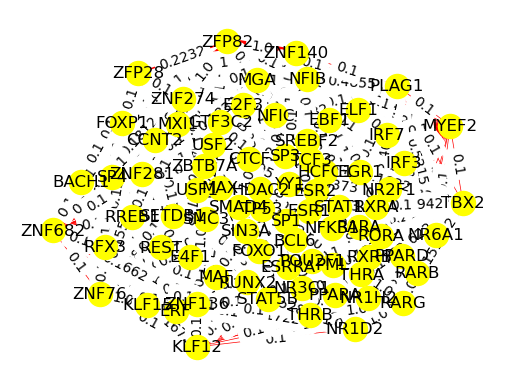

In [49]:
fixed_netrem_2a = nm.netrem(edge_list = filtered_ppi_for_TG, 
                     beta_net = 3,
                     alpha_lasso = 0.001,
                     view_network = True) # recommended that view_network = False since this is sadly a hairball! ☹️🙈
fixed_netrem_2a.fit(X_train, y_train)
mse_train = fixed_netrem_2a.test_mse(X_train, y_train)
mse_test = fixed_netrem_2a.test_mse(X_test, y_test)
print(f":) # of final TFs in the model for TG {tg}: {fixed_netrem_2a.num_final_predictors}")
print(f"Training MSE: {mse_train}")
print(f"Testing MSE: {mse_test}")

In [50]:
fixed_netrem_2a

NetREmModel(verbose=False, overlapped_nodes_only=False, all_pos_coefs=False, model_type=Lasso, standardize_X=True, center_y=True, use_network=True, y_intercept=False, max_lasso_iterations=10000, view_network=True, tolerance=0.0001, lasso_selection=cyclic, beta_net=3, network=<PriorGraphNetwork.PriorGraphNetwork object at 0x0000024C411EF880>, alpha_lasso=0.001)

![fixed_netrem_2a.png](../user_guide/pics/fixed_netrem_2a.png)

In [51]:
fixed_netrem_2a.model_nonzero_coef_df # the final # of non-zero predictors. 1 column is added due to y_intercept term. 

,y_intercept,BACH1,BCL6,CCNT2,CTCF,E2F3,E4F1,EBF1,EGR1,ELF1,...,YY1,ZBTB7A,ZFP28,ZFP82,ZNF136,ZNF140,ZNF274,ZNF281,ZNF682,ZNF76
0,None,0.084012,-0.010276,0.056163,-0.052647,0.125674,-0.146628,-0.051594,-0.027339,0.098493,...,0.120577,-0.046221,-0.040679,-0.000871,0.049932,0.060563,-0.043957,0.013799,-0.000044,0.105811


In [52]:
fixed_netrem_2a.combined_df

,coef,TF,TG,info,train_mse,beta_net,alpha_lasso,AbsoluteVal_coefficient,Rank,final_model_TFs,TFs_input_to_model,original_TFs_in_X,standardized_X,centered_y
0,None,y_intercept,ZZZ3,netrem_no_intercept,0.360479,3,0.001,NaN,76,75,77,77,True,True
1,0.084012,BACH1,ZZZ3,netrem_no_intercept,0.360479,3,0.001,0.084012,19,75,77,77,True,True
2,-0.010276,BCL6,ZZZ3,netrem_no_intercept,0.360479,3,0.001,0.010276,65,75,77,77,True,True
3,0.056163,CCNT2,ZZZ3,netrem_no_intercept,0.360479,3,0.001,0.056163,30,75,77,77,True,True
4,-0.052647,CTCF,ZZZ3,netrem_no_intercept,0.360479,3,0.001,0.052647,33,75,77,77,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0.060563,ZNF140,ZZZ3,netrem_no_intercept,0.360479,3,0.001,0.060563,27,75,77,77,True,True
72,-0.043957,ZNF274,ZZZ3,netrem_no_intercept,0.360479,3,0.001,0.043957,45,75,77,77,True,True
73,0.013799,ZNF281,ZZZ3,netrem_no_intercept,0.360479,3,0.001,0.013799,64,75,77,77,True,True
74,-0.000044,ZNF682,ZZZ3,netrem_no_intercept,0.360479,3,0.001,0.000044,75,75,77,77,True,True


In [53]:
fixed_netrem_2a

NetREmModel(verbose=False, overlapped_nodes_only=False, all_pos_coefs=False, model_type=Lasso, standardize_X=True, center_y=True, use_network=True, y_intercept=False, max_lasso_iterations=10000, view_network=True, tolerance=0.0001, lasso_selection=cyclic, beta_net=3, network=<PriorGraphNetwork.PriorGraphNetwork object at 0x0000024C411EF880>, alpha_lasso=0.001)

### Example 2b:
#### using user-defined values for  *beta_net* $\beta_{net}$ and LassoCV to find the optimal *alpha_lasso* .
This is the approach that Saniya utilized for NetREm for the paper :)📜👩‍🏫

:) # of final TFs in the model for TG ZZZ3: 67
Training MSE: 0.40284765315234555
Testing MSE: 0.6833977664046426


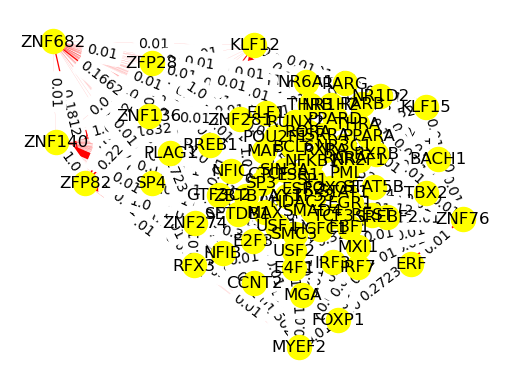

In [54]:
fixed_netrem_2b = nm.netrem(edge_list = filtered_ppi_for_TG, 
                     beta_net = 100,
                    y_intercept = True,
                    standardize_X = False, 
                    center_y = False,
                    default_edge_weight = 0.01,
                    degree_threshold = 0.5,
                     model_type = "LassoCV",
                     view_network = True)
fixed_netrem_2b.fit(X_train, y_train)
mse_train = fixed_netrem_2b.test_mse(X_train, y_train)
mse_test = fixed_netrem_2b.test_mse(X_test, y_test)
print(f":) # of final TFs in the model for TG {tg}: {fixed_netrem_2b.num_final_predictors}")

print(f"Training MSE: {mse_train}")
print(f"Testing MSE: {mse_test}")

In [55]:
fixed_netrem_2b.model_nonzero_coef_df # the final # of non-zero predictors. 1 column is added due to y_intercept term. 

,y_intercept,BACH1,CCNT2,CTCF,E2F3,E4F1,EBF1,ELF1,ERF,ESR1,...,TP53,USF1,USF2,YY1,ZBTB7A,ZNF136,ZNF140,ZNF274,ZNF682,ZNF76
0,0.06877,0.073128,0.060351,-0.08667,0.174759,-0.170537,-0.045644,0.130413,-0.082457,0.007668,...,-0.089806,0.069805,-0.015188,0.113233,-0.022505,0.056088,0.076585,-0.001909,0.00184,0.109638


In [56]:
fixed_netrem_2b.combined_df

,coef,TF,TG,info,train_mse,beta_net,alpha_lassoCV,AbsoluteVal_coefficient,Rank,final_model_TFs,TFs_input_to_model,original_TFs_in_X,standardized_X,centered_y
0,0.068770,y_intercept,ZZZ3,netrem_with_intercept,0.402848,100,Cross-Validation optimal alpha lasso: 0.004425...,0.068770,29,67,77,77,False,False
1,0.073128,BACH1,ZZZ3,netrem_with_intercept,0.402848,100,Cross-Validation optimal alpha lasso: 0.004425...,0.073128,27,67,77,77,False,False
2,0.060351,CCNT2,ZZZ3,netrem_with_intercept,0.402848,100,Cross-Validation optimal alpha lasso: 0.004425...,0.060351,34,67,77,77,False,False
3,-0.086670,CTCF,ZZZ3,netrem_with_intercept,0.402848,100,Cross-Validation optimal alpha lasso: 0.004425...,0.086670,19,67,77,77,False,False
4,0.174759,E2F3,ZZZ3,netrem_with_intercept,0.402848,100,Cross-Validation optimal alpha lasso: 0.004425...,0.174759,1,67,77,77,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,0.056088,ZNF136,ZZZ3,netrem_with_intercept,0.402848,100,Cross-Validation optimal alpha lasso: 0.004425...,0.056088,35,67,77,77,False,False
64,0.076585,ZNF140,ZZZ3,netrem_with_intercept,0.402848,100,Cross-Validation optimal alpha lasso: 0.004425...,0.076585,25,67,77,77,False,False
65,-0.001909,ZNF274,ZZZ3,netrem_with_intercept,0.402848,100,Cross-Validation optimal alpha lasso: 0.004425...,0.001909,66,67,77,77,False,False
66,0.001840,ZNF682,ZZZ3,netrem_with_intercept,0.402848,100,Cross-Validation optimal alpha lasso: 0.004425...,0.001840,67,67,77,77,False,False


In [57]:
fixed_netrem_2b

NetREmModel(verbose=False, overlapped_nodes_only=False, num_cv_folds=5, num_jobs=-1, all_pos_coefs=False, model_type=LassoCV, standardize_X=False, center_y=False, use_network=True, y_intercept=True, max_lasso_iterations=10000, view_network=True, tolerance=0.0001, lasso_selection=cyclic, lassocv_eps=0.001, lassocv_n_alphas=100, lassocv_alphas=None, beta_net=100, network=<PriorGraphNetwork.PriorGraphNetwork object at 0x0000024C5FFCA0B0>, alpha_lasso=LassoCV finds optimal alpha)

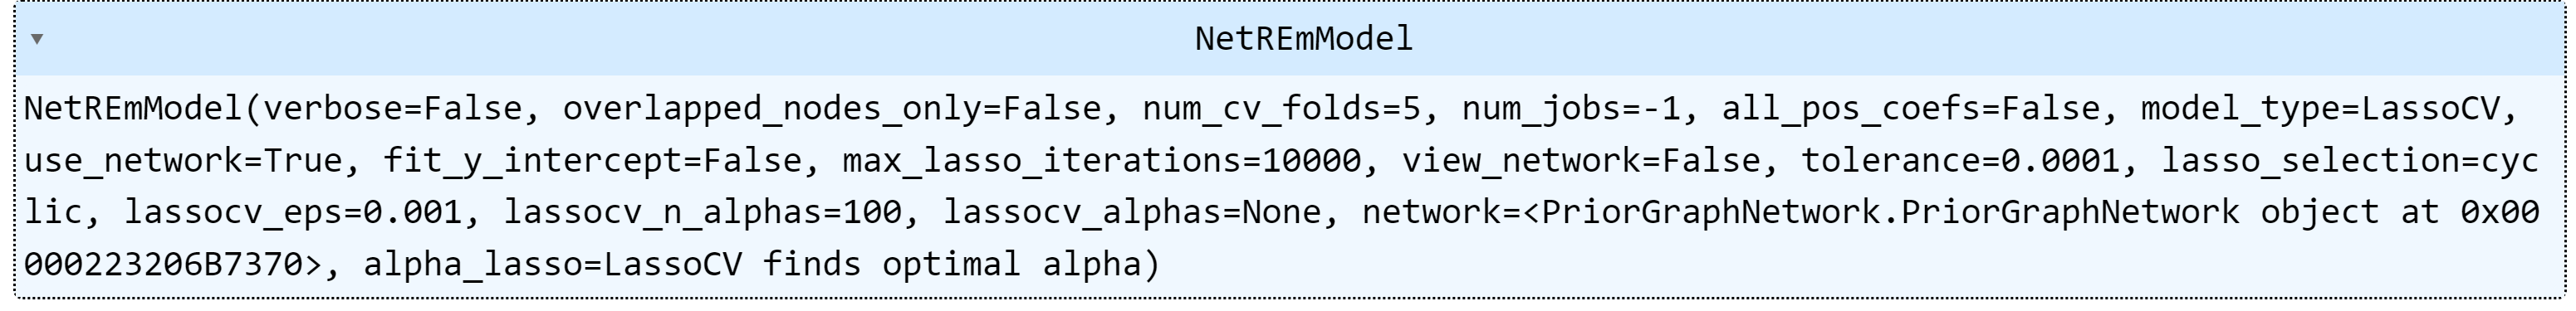

In [58]:
vars(fixed_netrem_2b).keys()

dict_keys(['info', 'verbose', 'overlapped_nodes_only', 'num_cv_folds', 'num_jobs', 'all_pos_coefs', 'model_type', 'standardize_X', 'center_y', 'use_network', 'y_intercept', 'max_lasso_iterations', 'view_network', 'model_info', 'target_gene_y', 'tolerance', 'lasso_selection', 'lassocv_eps', 'lassocv_n_alphas', 'lassocv_alphas', 'beta_net', 'network', 'alpha_lasso', 'optimal_alpha', 'prior_network', 'preprocessed_network', 'network_params', 'network_nodes_list', 'kwargs', 'X_df', 'mean_y_train', 'gene_expression_nodes', 'common_nodes', 'final_nodes', 'gexpr_nodes_added', 'gexpr_nodes_to_add_for_net', 'filter_network_bool', 'A_df', 'A', 'nodes', 'network_info', 'M', 'N', 'X_train', 'y_train', 'B_train', 'B_interaction_df', 'B_train_times_M', 'X_tilda_train', 'y_tilda_train', 'X_training_to_use', 'y_training_to_use', 'regr', 'final_alpha', 'coef', 'intercept', 'predY_tilda_train', 'mse_tilda_train', 'predY_train', 'mse_train', 'model_coef_df', 'model_nonzero_coef_df', 'sorted_coef_df', 'co

In [59]:
fixed_netrem_2b.get_params()

{'info': 'NetREm Model',
 'alpha_lasso': 'LassoCV finds optimal alpha',
 'beta_net': 100,
 'y_intercept': True,
 'model_type': 'LassoCV',
 'standardize_X': False,
 'center_y': False,
 'max_lasso_iterations': 10000,
 'network': <PriorGraphNetwork.PriorGraphNetwork at 0x24c61fd98d0>,
 'verbose': False,
 'all_pos_coefs': False,
 'model_info': 'fitted_model :)',
 'target_gene_y': 'ZZZ3',
 'num_cv_folds': 5,
 'num_jobs': -1,
 'lassocv_eps': 0.001,
 'lassocv_n_alphas': 100,
 'lassocv_alphas': None,
 'optimal_alpha': 'Cross-Validation optimal alpha lasso: 0.004425278133386773',
 'tolerance': 0.0001,
 'lasso_selection': 'cyclic'}

In [60]:
fixed_netrem_2b.final_corr_vs_coef_df

,info,input_data,BACH1,CCNT2,CTCF,E2F3,E4F1,EBF1,ELF1,ERF,...,TP53,USF1,USF2,YY1,ZBTB7A,ZNF136,ZNF140,ZNF274,ZNF682,ZNF76
0,network regression coeff. with y: ZZZ3,X_train,0.073128,0.060351,-0.086670,0.174759,-0.170537,-0.045644,0.130413,-0.082457,...,-0.089806,0.069805,-0.015188,0.113233,-0.022505,0.056088,0.076585,-0.001909,0.001840,0.109638
0,corr (r) with y: ZZZ3,X_train,0.191081,0.134249,-0.053487,0.160718,-0.046865,-0.047160,0.207914,-0.091996,...,-0.065173,0.085353,-0.025491,0.119843,-0.124585,-0.012445,0.132537,-0.000089,0.129738,0.124608
0,Absolute Value NetREm Coefficient Ranking,X_train,27.000000,34.000000,19.000000,1.000000,3.000000,41.000000,7.000000,21.000000,...,18.000000,28.000000,58.000000,9.000000,50.000000,35.000000,25.000000,66.000000,67.000000,10.000000


In [61]:
b_matrix_2b = nm.organize_B_interaction_network(fixed_netrem_2b)
b_matrix_2b

,TF1,TF2,B_train_weight,sign,potential_interaction,absVal_B,info,candidate_TFs_N,target_gene_y,num_final_predictors,model_type,beta_net,X_standardized,gene_data,rank,percentile
1028,NFIB,FOXO1,1.118503,:),:(,1.118503,B matrix of TF-TF interactions,77,ZZZ3,67,LassoCV,100,False,training gene expression data,1.0,99.982912
2092,FOXO1,NFIB,1.118503,:),:(,1.118503,B matrix of TF-TF interactions,77,ZZZ3,67,LassoCV,100,False,training gene expression data,1.0,99.982912
4416,NFIB,SREBF2,0.956989,:),:(,0.956989,B matrix of TF-TF interactions,77,ZZZ3,67,LassoCV,100,False,training gene expression data,3.0,99.948735
2136,SREBF2,NFIB,0.956989,:),:(,0.956989,B matrix of TF-TF interactions,77,ZZZ3,67,LassoCV,100,False,training gene expression data,3.0,99.948735
1046,RORA,FOXO1,0.928125,:),:(,0.928125,B matrix of TF-TF interactions,77,ZZZ3,67,LassoCV,100,False,training gene expression data,5.0,99.914559
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3834,TCF3,RXRB,-0.000012,:(,:( competitive (-),0.000012,B matrix of TF-TF interactions,77,ZZZ3,67,LassoCV,100,False,training gene expression data,5848.0,0.068353
2784,ESRRA,PML,-0.000010,:(,:( competitive (-),0.000010,B matrix of TF-TF interactions,77,ZZZ3,67,LassoCV,100,False,training gene expression data,5849.0,0.051265
960,PML,ESRRA,-0.000010,:(,:( competitive (-),0.000010,B matrix of TF-TF interactions,77,ZZZ3,67,LassoCV,100,False,training gene expression data,5849.0,0.051265
4708,ESR2,TCF3,-0.000009,:(,:( competitive (-),0.000009,B matrix of TF-TF interactions,77,ZZZ3,67,LassoCV,100,False,training gene expression data,5851.0,0.017088


### Example 2c: 
#### using GridSearchCV for comprehensive hyperparameter optimization🧮 for *beta_net* $\beta_{net}$ and *alpha_lasso* $\alpha_{lasso}$ .

In [62]:
%%time

demo1 = nm.netrem(edge_list = filtered_ppi_for_TG, 
                     view_network = False)
param_grid = {'beta_net': [1e-6,3, 0.1, 0.05, 1e-7, 5e-6, 0.01,1e-3, 0.2, 0.4, 0.5, 0.6, 0.8, 5, 1, 2],
   'alpha_lasso': [1e-5, 0.00001, 1e-8, 0.0001, 0.005, 0.001, 1e-9, 0.002, 0.1, 0.0023559, 0.003, 0.005, 0.01]}

griddy_demo1 = GridSearchCV(demo1, param_grid=param_grid, cv=5, n_jobs = -1, verbose = 10)
griddy_demo1.fit(X_train, y_train)

using beta_net default of 1
using alpha_lasso default of 0.01
Fitting 5 folds for each of 208 candidates, totalling 1040 fits
CPU times: total: 14.3 s
Wall time: 30.6 s


GridSearchCV(cv=5,
             estimator=NetREmModel(all_pos_coefs=False, alpha_lasso=0.01, beta_net=1, center_y=True, info='NetREm Model', lasso_selection='cyclic', max_lasso_iterations=10000, model_info='unfitted_model :(', model_type='Lasso', network=<PriorGraphNetwork.PriorGraphNetwork object at 0x0000024C6718B160>, standardize_X=True, target_gene_y='Unknown :(', tolerance=0.0001, verbose=False, y_intercept=False),
             n_jobs=-1,
             param_grid={'alpha_lasso': [1e-05, 1e-05, 1e-08, 0.0001, 0.005,
                                         0.001, 1e-09, 0.002, 0.1, 0.0023559,
                                         0.003, 0.005, 0.01],
                         'beta_net': [1e-06, 3, 0.1, 0.05, 1e-07, 5e-06, 0.01,
                                      0.001, 0.2, 0.4, 0.5, 0.6, 0.8, 5, 1,
                                      2]},
             verbose=10)

![gridster_0.png](../user_guide/pics/gridster_0.png)
![gridster_1.png](../user_guide/pics/gridster_1.png)

In [63]:
griddy_demo1.best_params_ # these are the parameters selected by the gridSearchCV

{'alpha_lasso': 1e-05, 'beta_net': 1e-06}

In [64]:
gridsearch_netrem_model = griddy_demo1.best_estimator_
gridsearch_netrem_model

NetREmModel(info=NetREm Model, verbose=False, all_pos_coefs=False, model_type=Lasso, standardize_X=True, center_y=True, y_intercept=False, max_lasso_iterations=10000, model_info=fitted_model :), target_gene_y=ZZZ3, tolerance=0.0001, lasso_selection=cyclic, beta_net=1e-06, alpha_lasso=1e-05, network=<PriorGraphNetwork.PriorGraphNetwork object at 0x0000024C61D1CAC0>)

![griddy_1.png](../user_guide/pics/griddy_1.png)

In [65]:
gridsearch_netrem_model.get_params()

{'info': 'NetREm Model',
 'alpha_lasso': 1e-05,
 'beta_net': 1e-06,
 'y_intercept': False,
 'model_type': 'Lasso',
 'standardize_X': True,
 'center_y': True,
 'max_lasso_iterations': 10000,
 'network': <PriorGraphNetwork.PriorGraphNetwork at 0x24c625d52d0>,
 'verbose': False,
 'all_pos_coefs': False,
 'model_info': 'fitted_model :)',
 'target_gene_y': 'ZZZ3',
 'tolerance': 0.0001,
 'lasso_selection': 'cyclic'}

In [66]:
print(f":) # of final TFs in the model for TG {tg}: {gridsearch_netrem_model.num_final_predictors}")
mse_train = gridsearch_netrem_model.test_mse(X_train, y_train)
mse_test = gridsearch_netrem_model.test_mse(X_test, y_test)
print(f"Training MSE: {mse_train}")
print(f"Testing MSE: {mse_test}")

:) # of final TFs in the model for TG ZZZ3: 77
Training MSE: 0.3602137542428914
Testing MSE: 0.9701276159767581


### Example 2d: 
#### using RandomizedSearchCV for more efficient (but less comprehensive) optimization for *beta_net* $\beta_{net}$ and *alpha_lasso* $\alpha_{lasso}$ .

In [67]:
from sklearn.model_selection import RandomizedSearchCV
demo2 = nm.netrem(edge_list = filtered_ppi_for_TG, 
                     view_network = False)

griddy_demo2 = RandomizedSearchCV(demo2, param_distributions=param_grid, cv=5, n_jobs = -1, verbose = 10)
griddy_demo2.fit(X_train, y_train)

using beta_net default of 1
using alpha_lasso default of 0.01
Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=NetREmModel(all_pos_coefs=False, alpha_lasso=0.01, beta_net=1, center_y=True, info='NetREm Model', lasso_selection='cyclic', max_lasso_iterations=10000, model_info='unfitted_model :(', model_type='Lasso', network=<PriorGraphNetwork.PriorGraphNetwork object at 0x0000024C61D65C90>, standardize_X=True, target_gene_y='Unknown :(', tolerance=0.0001, verbose=False, y_intercept=False),
                   n_jobs=-1,
                   param_distributions={'alpha_lasso': [1e-05, 1e-05, 1e-08,
                                                        0.0001, 0.005, 0.001,
                                                        1e-09, 0.002, 0.1,
                                                        0.0023559, 0.003, 0.005,
                                                        0.01],
                                        'beta_net': [1e-06, 3, 0.1, 0.05, 1e-07,
                                                     5e-06, 0.01, 0.001, 0.2,
                                                     0.4, 0.5, 0.6, 0.8, 5, 1,
                                                     2]},
                   verbose=10)

![rand_Search1.png](../user_guide/pics/rand_SearchA.png)
![rand_Search2.png](../user_guide/pics/rand_SearchB.png)

In [68]:
griddy_demo2.best_params_

{'beta_net': 0.01, 'alpha_lasso': 0.001}

In [69]:
randsearch_netrem_model = griddy_demo2.best_estimator_
randsearch_netrem_model

NetREmModel(info=NetREm Model, verbose=False, all_pos_coefs=False, model_type=Lasso, standardize_X=True, center_y=True, y_intercept=False, max_lasso_iterations=10000, model_info=fitted_model :), target_gene_y=ZZZ3, tolerance=0.0001, lasso_selection=cyclic, beta_net=0.01, alpha_lasso=0.001, network=<PriorGraphNetwork.PriorGraphNetwork object at 0x0000024C62624E80>)

![rand_Search1.png](../user_guide/pics/rand_Search1.png)
![rand_Search2.png](../user_guide/pics/rand_Search2.png)

In [70]:
print(f":) # of final TFs in the model for TG {tg}: {randsearch_netrem_model.num_final_predictors}")
mse_train = randsearch_netrem_model.test_mse(X_train, y_train)
mse_test = randsearch_netrem_model.test_mse(X_test, y_test)
print(f"Training MSE: {mse_train}")
print(f"Testing MSE: {mse_test}")

:) # of final TFs in the model for TG ZZZ3: 75
Training MSE: 0.36040270850032935
Testing MSE: 0.9443122893027671


In [71]:
randsearch_netrem_model.model_nonzero_coef_df

,y_intercept,BACH1,BCL6,CCNT2,CTCF,E2F3,E4F1,EBF1,EGR1,ELF1,...,YY1,ZBTB7A,ZFP28,ZFP82,ZNF136,ZNF140,ZNF274,ZNF281,ZNF682,ZNF76
0,None,0.08414,-0.010399,0.056392,-0.052637,0.126042,-0.147616,-0.052114,-0.027951,0.098854,...,0.121379,-0.046339,-0.041329,-0.000981,0.050573,0.06063,-0.044295,0.014177,-0.002616,0.107527


### Example 2e: 
#### using Bayesian Optimization and Gaussian Processes to determine the optimal *beta_net* $\beta_{net}$ and *alpha_lasso* $\alpha_{lasso}$  given a potential range of values.


In [72]:
%%time
netrem_bayes_demo2 = nm.netrem(edge_list = filtered_ppi_for_TG, 
                        y_intercept = True)

bayesian_netty2 = nm_eval.optimal_netrem_model_via_bayesian_param_tuner(netrem_bayes_demo2,
                                                                        X_train, y_train,
                                                                       beta_net_min = 1, 
                                                                      beta_net_max = 100, 
                                                                      alpha_lasso_min = 0.0001,
                                                                      alpha_lasso_max = 0.01,                                                 
                                                                      num_grid_values = 50)
bayesian_net_model2 = bayesian_netty2["optimal_model"]
bayesian_net_model2

using beta_net default of 1
using alpha_lasso default of 0.01
:) Please note that we are running: optimal_netrem_model_via_bayesian_param_tuner
alpha_lasso = 0.01 ; beta_network = 1.0
{'info': 'NetREm Model', 'alpha_lasso': 0.01, 'beta_net': 1, 'y_intercept': True, 'model_type': 'Lasso', 'standardize_X': True, 'center_y': True, 'max_lasso_iterations': 10000, 'network': <PriorGraphNetwork.PriorGraphNetwork object at 0x0000024C6004B0A0>, 'verbose': False, 'all_pos_coefs': False, 'model_info': 'fitted_model :)', 'target_gene_y': 'ZZZ3', 'tolerance': 0.0001, 'lasso_selection': 'cyclic'}
CPU times: total: 9.81 s
Wall time: 35.2 s


NetREmModel(info=NetREm Model, verbose=False, all_pos_coefs=False, model_type=Lasso, standardize_X=True, center_y=True, y_intercept=True, max_lasso_iterations=10000, model_info=fitted_model :), target_gene_y=ZZZ3, tolerance=0.0001, lasso_selection=cyclic, beta_net=1, alpha_lasso=0.01, network=<PriorGraphNetwork.PriorGraphNetwork object at 0x0000024C6267AC20>)

![bayesian_net_model2.png](../user_guide/pics/bayesian_net_model2.png)

In [73]:
bayesian_net_model2.get_params()

{'info': 'NetREm Model',
 'alpha_lasso': 0.01,
 'beta_net': 1,
 'y_intercept': True,
 'model_type': 'Lasso',
 'standardize_X': True,
 'center_y': True,
 'max_lasso_iterations': 10000,
 'network': <PriorGraphNetwork.PriorGraphNetwork at 0x24c60267010>,
 'verbose': False,
 'all_pos_coefs': False,
 'model_info': 'fitted_model :)',
 'target_gene_y': 'ZZZ3',
 'tolerance': 0.0001,
 'lasso_selection': 'cyclic'}

In [74]:
print(f":) # of final TFs in the model for TG {tg}: {bayesian_net_model2.num_final_predictors}")
mse_train = bayesian_net_model2.test_mse(X_train, y_train)
mse_test = bayesian_net_model2.test_mse(X_test, y_test)
print(f"Training MSE: {mse_train}")
print(f"Testing MSE: {mse_test}")

:) # of final TFs in the model for TG ZZZ3: 64
Training MSE: 0.373781466258218
Testing MSE: 0.8009029703778703


In [75]:
bayesian_net_model2.model_nonzero_coef_df

,y_intercept,BACH1,CCNT2,CTCF,E2F3,E4F1,EBF1,EGR1,ELF1,ERF,...,USF2,YY1,ZBTB7A,ZFP28,ZNF136,ZNF140,ZNF274,ZNF281,ZNF682,ZNF76
0,-0.006215,0.082485,0.036405,-0.043856,0.112232,-0.116729,-0.035901,-0.008092,0.09914,-0.078861,...,-0.033772,0.09549,-0.039055,-0.03046,0.015235,0.05151,-0.014809,0.010673,0.003004,0.077792


In [76]:
bayesian_net_model2.combined_df

,coef,TF,TG,info,train_mse,beta_net,alpha_lasso,AbsoluteVal_coefficient,Rank,final_model_TFs,TFs_input_to_model,original_TFs_in_X,standardized_X,centered_y
0,-0.006215,y_intercept,ZZZ3,netrem_with_intercept,0.373781,1,0.01,0.006215,62,64,77,77,True,True
1,0.082485,BACH1,ZZZ3,netrem_with_intercept,0.373781,1,0.01,0.082485,10,64,77,77,True,True
2,0.036405,CCNT2,ZZZ3,netrem_with_intercept,0.373781,1,0.01,0.036405,34,64,77,77,True,True
3,-0.043856,CTCF,ZZZ3,netrem_with_intercept,0.373781,1,0.01,0.043856,27,64,77,77,True,True
4,0.112232,E2F3,ZZZ3,netrem_with_intercept,0.373781,1,0.01,0.112232,4,64,77,77,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,0.051510,ZNF140,ZZZ3,netrem_with_intercept,0.373781,1,0.01,0.051510,24,64,77,77,True,True
61,-0.014809,ZNF274,ZZZ3,netrem_with_intercept,0.373781,1,0.01,0.014809,57,64,77,77,True,True
62,0.010673,ZNF281,ZZZ3,netrem_with_intercept,0.373781,1,0.01,0.010673,58,64,77,77,True,True
63,0.003004,ZNF682,ZZZ3,netrem_with_intercept,0.373781,1,0.01,0.003004,64,64,77,77,True,True


In [77]:
vars(bayesian_net_model2).keys()

dict_keys(['info', 'verbose', 'overlapped_nodes_only', 'num_cv_folds', 'num_jobs', 'all_pos_coefs', 'model_type', 'standardize_X', 'center_y', 'use_network', 'y_intercept', 'max_lasso_iterations', 'view_network', 'model_info', 'target_gene_y', 'tolerance', 'lasso_selection', 'lassocv_eps', 'lassocv_n_alphas', 'lassocv_alphas', 'beta_net', 'alpha_lasso', 'network', 'optimal_alpha', 'prior_network', 'preprocessed_network', 'network_params', 'network_nodes_list', 'kwargs', 'old_X_df', 'scaler', 'X_df', 'mean_y_train', 'old_y', 'gene_expression_nodes', 'common_nodes', 'final_nodes', 'gexpr_nodes_added', 'gexpr_nodes_to_add_for_net', 'filter_network_bool', 'A_df', 'A', 'nodes', 'network_info', 'M', 'N', 'X_train', 'y_train', 'B_train', 'B_interaction_df', 'B_train_times_M', 'X_tilda_train', 'y_tilda_train', 'X_training_to_use', 'y_training_to_use', 'regr', 'final_alpha', 'coef', 'intercept', 'predY_tilda_train', 'mse_tilda_train', 'predY_train', 'mse_train', 'model_coef_df', 'model_nonzero_

In [78]:
b_matrix_2e = nm.organize_B_interaction_network(bayesian_net_model2)
b_matrix_2e

,TF1,TF2,B_train_weight,sign,potential_interaction,absVal_B,info,candidate_TFs_N,target_gene_y,num_final_predictors,model_type,beta_net,X_standardized,gene_data,rank,percentile
3089,ERF,RARA,0.377660,:),:(,0.377660,B matrix of TF-TF interactions,77,ZZZ3,64,Lasso,1,True,training gene expression data,1.0,99.982912
733,RARA,ERF,0.377660,:),:(,0.377660,B matrix of TF-TF interactions,77,ZZZ3,64,Lasso,1,True,training gene expression data,1.0,99.982912
4830,SP4,THRA,0.309812,:),:(,0.309812,B matrix of TF-TF interactions,77,ZZZ3,64,Lasso,1,True,training gene expression data,3.0,99.948735
4374,THRA,SP4,0.309812,:),:(,0.309812,B matrix of TF-TF interactions,77,ZZZ3,64,Lasso,1,True,training gene expression data,3.0,99.948735
1157,CCNT2,GTF3C2,0.294422,:),:(,0.294422,B matrix of TF-TF interactions,77,ZZZ3,64,Lasso,1,True,training gene expression data,5.0,99.914559
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2104,MXI1,NFIB,-0.000099,:(,:( competitive (-),0.000099,B matrix of TF-TF interactions,77,ZZZ3,64,Lasso,1,True,training gene expression data,5847.0,0.085441
501,PPARD,EBF1,-0.000073,:(,:( competitive (-),0.000073,B matrix of TF-TF interactions,77,ZZZ3,64,Lasso,1,True,training gene expression data,5849.0,0.051265
3009,EBF1,PPARD,-0.000073,:(,:( competitive (-),0.000073,B matrix of TF-TF interactions,77,ZZZ3,64,Lasso,1,True,training gene expression data,5849.0,0.051265
4416,NFIB,SREBF2,0.000017,:),:(,0.000017,B matrix of TF-TF interactions,77,ZZZ3,64,Lasso,1,True,training gene expression data,5851.0,0.017088


## Example 3️⃣: 
### More intensive hyperparameter tuning
Here, please note that we focus on more hyperparameters that we may tune on, such as including the y-intercept term (or not?), or using Lasso versus LassoCV (and when LassoCV is being tested, we ignore the input alpha_lasso in the param_grid values). 😊

### Example 3a:
#### User optimizes over several hyperparameters using GridSearchCV (comprehensive):


In [79]:
%%time

demo3 = nm.netrem(edge_list = filtered_ppi_for_TG, 
                     view_network = False)

larger_param_grid = {
    'beta_net': [0.1, 0.05,0.01, 0.2, 0.4, 0.5, 0.6, 0.8, 5, 1, 2, 10],
    'alpha_lasso': [1e-5, 0.00001, 0.0001, 0.005, 0.001, 0.002, 0.1, 0.003, 0.005, 0.01],
    'y_intercept': [True, False],
    'model_type': ["Lasso", "LassoCV"]}

griddy_demo3 = GridSearchCV(demo3, param_grid=larger_param_grid, cv=5, n_jobs = -1, verbose = 10)
griddy_demo3.fit(X_train, y_train)

using beta_net default of 1
using alpha_lasso default of 0.01
Fitting 5 folds for each of 480 candidates, totalling 2400 fits
CPU times: total: 44 s
Wall time: 1min 8s


GridSearchCV(cv=5,
             estimator=NetREmModel(all_pos_coefs=False, alpha_lasso=0.01, beta_net=1, center_y=True, info='NetREm Model', lasso_selection='cyclic', max_lasso_iterations=10000, model_info='unfitted_model :(', model_type='Lasso', network=<PriorGraphNetwork.PriorGraphNetwork object at 0x0000024C6004AAD0>, standardize_X=True, target_gene_y='Unknown :(', tolerance=0.0001, verbose=False, y_intercept=False),
             n_jobs=-1,
             param_grid={'alpha_lasso': [1e-05, 1e-05, 0.0001, 0.005, 0.001,
                                         0.002, 0.1, 0.003, 0.005, 0.01],
                         'beta_net': [0.1, 0.05, 0.01, 0.2, 0.4, 0.5, 0.6, 0.8,
                                      5, 1, 2, 10],
                         'model_type': ['Lasso', 'LassoCV'],
                         'y_intercept': [True, False]},
             verbose=10)

![gridster_0.png](../user_guide/pics/gridster_0.png)
![massive_griddy.png](../user_guide/pics/massive_griddy.png)


In [80]:
#griddy_demo3.cv_results_ # to view the results from GridSearchCV
